In [1]:
import datetime as dt

import numpy as np
import pandas as pd

import pyarrow.parquet as pq

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read Parquet file into an Arrow Table
# table1 = pq.read_table("../02_Leveraged ETFs/00_data/MSTR.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/MSTU.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/IBIT.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/BITU.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/IBIT.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/MSTR.parquet")      # Not an LETF but interesting case study due to the high exposure to Bitcoin

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/TSLA.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/TSLL.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/TSLA.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/TSLS.parquet")

table1 = pq.read_table("../02_Leveraged ETFs/00_data/QQQ.parquet")
table2 = pq.read_table("../02_Leveraged ETFs/00_data/TQQQ.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/QQQ.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SQQQ.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/SPY.parquet")       # Big Size File       
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/UPRO.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/SPY.parquet")       # Big Size File
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SPXL.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/SPY.parquet")       # Big Size File
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SPXU.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/UPRO.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SPXL.parquet")

# table1 = pq.read_table("../02_Leveraged ETFs/00_data/SPXL.parquet")
# table2 = pq.read_table("../02_Leveraged ETFs/00_data/SPXU.parquet")

In [3]:

# Convert Arrow Table back to Pandas DataFrame
df1 = table1.to_pandas()
df2 = table2.to_pandas() # (df2 usually is the leveraged ETF)

In [4]:
# # Extract Ticker symbols directly from df1 and df2, column 'Ticker', unique values
ticker1 = df1['Ticker'].unique()[0]
ticker2 = df2['Ticker'].unique()[0]

In [5]:
df1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
162388,2011-03-23 06:28:00,QQQ,1300876080000,55.50,55.50,55.50,55.50,100.0,55.50,1
162389,2011-03-23 06:35:00,QQQ,1300876500000,55.45,55.45,55.45,55.45,100.0,55.45,1
162390,2011-03-23 06:50:00,QQQ,1300877400000,55.48,55.48,55.48,55.48,100.0,55.48,1
162391,2011-03-23 07:00:00,QQQ,1300878000000,55.48,55.48,55.48,55.48,1000.0,55.48,1
162392,2011-03-23 07:02:00,QQQ,1300878120000,55.51,55.51,55.51,55.51,100.0,55.51,1


In [6]:
print(df1.columns)

"""
T: This is a timestamp in milliseconds (Unix epoch time). 
The value 1760140500000 converts to October 10, 2025, 19:55:00 UTC, which matches the Date column.

N: This is likely the number of trades or number of data points used to calculate the VWAP for that time interval. 
The value 26 suggests 26 individual trades or ticks were aggregated.

The N column provides useful information about data quality. 
Higher values of N typically indicate more liquid trading periods with better VWAP reliability
""";

Index(['Date', 'Ticker', 'T', 'Open', 'High', 'Low', 'Close', 'Volume', 'VWAP',
       'N'],
      dtype='object')


In [7]:
df1.tail()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
2715573,2025-10-10 19:55:00,QQQ,1760140500000,590.3000,590.46,590.13,590.13,6596.0,590.2830,120
2715574,2025-10-10 19:56:00,QQQ,1760140560000,590.1300,590.13,590.01,590.01,3495.0,590.0912,96
2715575,2025-10-10 19:57:00,QQQ,1760140620000,590.0000,590.05,589.88,590.01,4246.0,590.0132,112
2715576,2025-10-10 19:58:00,QQQ,1760140680000,590.0100,590.10,589.90,590.02,4297.0,590.0034,95
2715577,2025-10-10 19:59:00,QQQ,1760140740000,589.8782,590.00,589.87,589.93,9448.0,589.9504,97


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2553190 entries, 162388 to 2715577
Data columns (total 10 columns):
 #   Column  Dtype         
---  ------  -----         
 0   Date    datetime64[ns]
 1   Ticker  object        
 2   T       int64         
 3   Open    float64       
 4   High    float64       
 5   Low     float64       
 6   Close   float64       
 7   Volume  float64       
 8   VWAP    float64       
 9   N       int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(1)
memory usage: 214.3+ MB


In [9]:
df2.tail(5)

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N
2412664,2025-10-10 19:55:00,TQQQ,1760140500000,97.49,97.50,97.4400,97.4400,17015.0,97.4800,121
2412665,2025-10-10 19:56:00,TQQQ,1760140560000,97.41,97.41,97.2800,97.2875,12656.0,97.3186,158
2412666,2025-10-10 19:57:00,TQQQ,1760140620000,97.27,97.37,97.2500,97.3100,12703.0,97.2937,109
2412667,2025-10-10 19:58:00,TQQQ,1760140680000,97.38,97.39,97.3095,97.3400,6978.0,97.3303,80
2412668,2025-10-10 19:59:00,TQQQ,1760140740000,97.33,97.35,97.3200,97.3300,12489.0,97.3288,152


In [10]:
# Add year, month, day, hour, minute columns for easier filtering on df1 and df2
for df in [df1, df2]:
    df['year'] = pd.to_datetime(df['Date']).dt.year
    df['month'] = pd.to_datetime(df['Date']).dt.month
    df['day'] = pd.to_datetime(df['Date']).dt.day
    df['hour'] = pd.to_datetime(df['Date']).dt.hour
    df['minute'] = pd.to_datetime(df['Date']).dt.minute

In [11]:
# Add a new column 'ym' representing the last day of each month on df1 and df2
for df in [df1, df2]:
    df['ym'] = pd.to_datetime(df['Date']).dt.to_period('M').dt.to_timestamp('M') + pd.offsets.MonthEnd(0)

In [12]:
# Create trading day counter for minute-level data
for df in [df1, df2]:
    # First, extract just the date (without time) from the datetime
    df['date_only'] = pd.to_datetime(df['Date']).dt.date
    
    # For each year-month group, get unique dates and assign trading day numbers
    df['td'] = df.groupby('ym')['date_only'].transform(
        lambda x: pd.factorize(x)[0] + 1
    )

In [13]:
# Add week number, dt.isocalendar()[1]  # ISO week number
for df in [df1, df2]:
    df['week_number'] = pd.to_datetime(df['Date']).dt.isocalendar().week

In [14]:
# Add day identifier, int to indicate the day of week (0=Monday, 6=Sunday) on df1 and df2
for df in [df1, df2]:
    df['day_of_week'] = pd.to_datetime(df['Date']).dt.dayofweek

In [15]:
# VWAP signal, if Close > VWAP -> 1 else 0 on df1 and df2
for df in [df1, df2]:
    df['vwap_signal'] = np.where(df['Close'] > df['VWAP'], 1, 0)

In [16]:
# Calculate daily simple returns for df1 and df2
# Calculate percentage change of 'Close' within each ticker
df1['ret'] = df1.groupby('Ticker')['Close'].pct_change()
df2['ret'] = df2.groupby('Ticker')['Close'].pct_change()

# fill na values in ret with 0
df1['ret'] = df1['ret'].fillna(0)
df2['ret'] = df2['ret'].fillna(0)

In [17]:
# calculate cumulative returns for df1 and df2
df1['cumret'] = (1 + df1['ret']).cumprod() - 1
df2['cumret'] = (1 + df2['ret']).cumprod() - 1

In [18]:
# Filter last 180 days of data for both df1 and df2
end_date = max(df1['Date'].max(), df2['Date'].max())
start_date = end_date - pd.Timedelta(days=180)
df1_last_180 = df1[df1['Date'] >= start_date]
df2_last_180 = df2[df2['Date'] >= start_date]

In [19]:
"""
Leveraged ETFs tend to have lower length of data compared to their underlying assets due to most recent inception dates.
Apply below filtering only when comparing leveraged ETF with its underlying asset.
""";

In [20]:
# Filter df1 by min() date of df2.date_only (df2 usually is the leveraged ETF, with shorter history)
min_date_df2 = df2['date_only'].min()
df1 = df1[df1['date_only'] >= min_date_df2]

In [21]:
# Add backtest df to be used for strategies backtesting
bt1 = df1.copy()
bt2 = df2.copy()

In [22]:
# # Filter df1 and df2 for Market hours only (9:30 to 16:00), Intraday data
# market_hours_df1 = df1[(df1['hour'] >= 9) & ((df1['hour'] < 16) | ((df1['hour'] == 9) & (df1['minute'] >= 30)))].copy()
# market_hours_df2 = df2[(df2['hour'] >= 9) & ((df2['hour'] < 16) | ((df2['hour'] == 9) & (df2['minute'] >= 30)))].copy()

# # Filter df1 and df2 for first hour of market only
# first_hour_df1 = df1[((df1['hour'] == 9) & (df1['minute'] >= 30)) | (df1['hour'] == 10)].copy()
# first_hour_df2 = df2[((df2['hour'] == 9) & (df2['minute'] >= 30)) | (df2['hour'] == 10)].copy()

# # Filter df1 and df2 for last hour of market only
# last_hour_df1 = df1[(df1['hour'] == 15)].copy()
# last_hour_df2 = df2[(df2['hour'] == 15)].copy()

In [23]:
# Group df1 and df2 by date_only and calculate daily returns
df1_daily = df1.groupby('date_only').agg({'Close': 'last'}).reset_index()
df1_daily['ret'] = df1_daily['Close'].pct_change().fillna(0)
df1_daily['cumret'] = (1 + df1_daily['ret']).cumprod() - 1
df2_daily = df2.groupby('date_only').agg({'Close': 'last'}).reset_index()
df2_daily['ret'] = df2_daily['Close'].pct_change().fillna(0)
df2_daily['cumret'] = (1 + df2_daily['ret']).cumprod() - 1

# Join df1_daily and df2_daily on date_only
df_joined = df1_daily.merge(df2_daily, on='date_only', suffixes=(f'_{ticker1}', f'_{ticker2}'))

# Display first few rows of df_joined
df_joined.head()

,date_only,Close_QQQ,ret_QQQ,cumret_QQQ,Close_TQQQ,ret_TQQQ,cumret_TQQQ
0,2011-03-23,55.66,0.000000,0.000000,0.8086,0.014682,0.869595
1,2011-03-24,56.89,0.022098,0.022098,0.8630,0.067277,0.995376
2,2011-03-25,56.94,0.000879,0.022997,0.8645,0.001738,0.998844
3,2011-03-28,56.40,-0.009484,0.013295,0.8405,-0.027762,0.943353
4,2011-03-29,57.00,0.010638,0.024075,0.8672,0.031767,1.005087


In [24]:
bt1.head()

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N,...,hour,minute,ym,date_only,td,week_number,day_of_week,vwap_signal,ret,cumret
162388,2011-03-23 06:28:00,QQQ,1300876080000,55.50,55.50,55.50,55.50,100.0,55.50,1,...,6,28,2011-03-31,2011-03-23,1,12,2,0,0.000000,0.000000
162389,2011-03-23 06:35:00,QQQ,1300876500000,55.45,55.45,55.45,55.45,100.0,55.45,1,...,6,35,2011-03-31,2011-03-23,1,12,2,0,-0.000901,-0.000901
162390,2011-03-23 06:50:00,QQQ,1300877400000,55.48,55.48,55.48,55.48,100.0,55.48,1,...,6,50,2011-03-31,2011-03-23,1,12,2,0,0.000541,-0.000360
162391,2011-03-23 07:00:00,QQQ,1300878000000,55.48,55.48,55.48,55.48,1000.0,55.48,1,...,7,0,2011-03-31,2011-03-23,1,12,2,0,0.000000,-0.000360
162392,2011-03-23 07:02:00,QQQ,1300878120000,55.51,55.51,55.51,55.51,100.0,55.51,1,...,7,2,2011-03-31,2011-03-23,1,12,2,0,0.000541,0.000180


In [25]:
# Create daily df, grouping by date_only and aggregating OHLCV data (keep last for Open, High, Low, Close; sum for Volume)
daily_df1 = bt1.groupby('date_only').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

daily_df2 = bt2.groupby('date_only').agg({
    'Open': 'first',
    'High': 'max',
    'Low': 'min',   
    'Close': 'last',
    'Volume': 'sum'
}).reset_index()

In [26]:
daily_df1.head()

,date_only,Open,High,Low,Close,Volume
0,2011-03-23,55.50,55.87,54.82,55.66,60058153.0
1,2011-03-24,55.75,58.52,55.74,56.89,69074621.0
2,2011-03-25,56.99,57.22,56.76,56.94,68932140.0
3,2011-03-28,56.84,57.15,56.37,56.40,37618558.0
4,2011-03-29,56.61,57.15,56.23,57.00,45477729.0


In [27]:
# # Plot daily df for visualization purposes
# plt.figure(figsize=(14, 7))
# # plt.plot(daily_df1['date_only'], daily_df1['Close'], label=ticker1, color='blue')
# plt.plot(daily_df2['date_only'], daily_df2['Close'], label=ticker2, color='orange')
# plt.title(f'Daily Close Prices: {ticker1} vs {ticker2}')
# plt.xlabel('Date')
# plt.ylabel('Close Price')
# plt.legend()
# plt.show()

In [28]:
# ----------------------------------------------------------------------
# Intraday Strategy, "End-of-Day Reversal" Analysis
# ---------------------------------------------------------------------- 

In [29]:
"""
paper: End-of-Day Reversal

The main time slots and their combinations, as defined in the sources, are:

1. Overnight (ON): The period from the market close to the market open.

2. First half-hour (FH): The first 30 minutes after the market open.

3. Middle-of-the-day (M): The period from the end of FH until one hour before the market close. 
It is specifically defined as the return from 10:00 a.m. to 3:00 p.m. on the given day.

4. Second-to-last half-hour (SLH): The second-to-last 30-minute interval before the market close.

5. Last half-hour (LH): The last 30 minutes before the market close (3:30 p.m. to 4:00 p.m. EST).

Combinations of these time periods are also used as key predictor variables:
• ONFH: The combination of ON and FH.
• ROD3 (Rest-Of-Day-3): The combination of ON, FH, and M, which is the key predictor for much of the analysis. 
ROD3 represents the return from the market close on day t−1 until 3:00 p.m. on day t.

""";

In [30]:
# Define the dfs
eod1 = bt1.copy()  # Intraday data
eod2 = bt2.copy()  # Intraday data

In [31]:
def add_time_periods(df):
    """
    Add time period flags according to the paper:
    - ON (Overnight): From market close (16:00) to market open (9:30)
    - FH (First Half-hour): 9:30 to 10:00
    - M (Middle-of-the-day): 10:00 to 15:00  
    - SLH (Second-to-Last Half-hour): 15:00 to 15:30
    - LH (Last Half-hour): 15:30 to 16:00
    """
    df = df.copy()
    
    # Initialize time period flag
    df['time_period'] = 'Unknown'
    
    # Overnight (ON): 16:00 onwards OR before 9:30
    df.loc[
        (df['hour'] >= 16) |
        (df['hour'] < 9) |
        ((df['hour'] == 9) & (df['minute'] < 30)),
        'time_period'
    ] = 'ON'
    
    # First Half-hour (FH): 9:30 to 9:59
    df.loc[
        (df['hour'] == 9) & (df['minute'] >= 30),
        'time_period'
    ] = 'FH'
    
    # Middle-of-the-day (M): 10:00 to 14:59
    df.loc[
        (df['hour'] >= 10) & (df['hour'] < 15),
        'time_period'
    ] = 'M'
    
    # Second-to-Last Half-hour (SLH): 15:00 to 15:29
    df.loc[
        (df['hour'] == 15) & (df['minute'] < 30),
        'time_period'
    ] = 'SLH'
    
    # Last Half-hour (LH): 15:30 to 15:59
    df.loc[
        (df['hour'] == 15) & (df['minute'] >= 30),
        'time_period'
    ] = 'LH'
    
    return df

eod1 = add_time_periods(eod1)
eod2 = add_time_periods(eod2)

In [32]:
# Print unique time periods to verify
print("Unique time periods in ticker 1 data:", eod1['time_period'].unique())
print("Unique time periods in ticker 2 data:", eod2['time_period'].unique())

Unique time periods in ticker 1 data: ['ON' 'FH' 'M' 'SLH' 'LH']
Unique time periods in ticker 2 data: ['FH' 'M' 'SLH' 'LH' 'ON']


In [33]:
# Verify time period boundaries
print("=== Time Period Verification ===")

print(f"\nFH (9:30-10:00):")
fh_data = eod1[eod1['time_period'] == 'FH']
print(f"  Min: {fh_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {fh_data[['hour', 'minute']].max().tolist()}")

print(f"\nM (10:00-15:00):")
m_data = eod1[eod1['time_period'] == 'M']
print(f"  Min: {m_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {m_data[['hour', 'minute']].max().tolist()}")

print(f"\nSLH (15:00-15:30):")
slh_data = eod1[eod1['time_period'] == 'SLH']
print(f"  Min: {slh_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {slh_data[['hour', 'minute']].max().tolist()}")

print(f"\nLH (15:30-16:00):")
lh_data = eod1[eod1['time_period'] == 'LH']
print(f"  Min: {lh_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {lh_data[['hour', 'minute']].max().tolist()}")

print(f"\nON (overnight):")
on_data = eod1[eod1['time_period'] == 'ON']
print(f"  Min: {on_data[['hour', 'minute']].min().tolist()}")
print(f"  Max: {on_data[['hour', 'minute']].max().tolist()}")

print("\n=== Time Period Distribution ===")
print(eod1['time_period'].value_counts())

=== Time Period Verification ===

FH (9:30-10:00):
  Min: [9, 30]
  Max: [9, 59]

M (10:00-15:00):
  Min: [10, 0]
  Max: [14, 59]

SLH (15:00-15:30):
  Min: [15, 0]
  Max: [15, 29]

LH (15:30-16:00):
  Min: [15, 30]
  Max: [15, 59]

ON (overnight):
  Min: [3, 0]
  Max: [20, 59]

=== Time Period Distribution ===
time_period
ON     1131215
M      1094412
FH      109788
LH      108900
SLH     108875
Name: count, dtype: int64


In [34]:
eod1.head(5)

,Date,Ticker,T,Open,High,Low,Close,Volume,VWAP,N,...,minute,ym,date_only,td,week_number,day_of_week,vwap_signal,ret,cumret,time_period
162388,2011-03-23 06:28:00,QQQ,1300876080000,55.50,55.50,55.50,55.50,100.0,55.50,1,...,28,2011-03-31,2011-03-23,1,12,2,0,0.000000,0.000000,ON
162389,2011-03-23 06:35:00,QQQ,1300876500000,55.45,55.45,55.45,55.45,100.0,55.45,1,...,35,2011-03-31,2011-03-23,1,12,2,0,-0.000901,-0.000901,ON
162390,2011-03-23 06:50:00,QQQ,1300877400000,55.48,55.48,55.48,55.48,100.0,55.48,1,...,50,2011-03-31,2011-03-23,1,12,2,0,0.000541,-0.000360,ON
162391,2011-03-23 07:00:00,QQQ,1300878000000,55.48,55.48,55.48,55.48,1000.0,55.48,1,...,0,2011-03-31,2011-03-23,1,12,2,0,0.000000,-0.000360,ON
162392,2011-03-23 07:02:00,QQQ,1300878120000,55.51,55.51,55.51,55.51,100.0,55.51,1,...,2,2011-03-31,2011-03-23,1,12,2,0,0.000541,0.000180,ON


In [35]:
#  Modified to calculate ON returns
#  This properly captures the full overnight gap from the previous 
#  day's last trading close to the current day's market open.
def calculate_period_returns(df):
    """
    Calculate returns for each time period per day.
    Returns a daily DataFrame with columns for each period's return.
    
    ON (Overnight) is calculated as: (Open at 9:30 on day t) / (Close at 16:00 on day t-1) - 1
    This properly spans the overnight gap including AH and pre-market.
    """
    df = df.copy()
    df = df.sort_values('Date')
    
    # === Calculate market hours periods (FH, M, SLH, LH) ===
    # These are calculated within the same day
    market_periods = df[df['time_period'].isin(['FH', 'M', 'SLH', 'LH'])]
    
    period_prices = market_periods.groupby(['date_only', 'time_period']).agg({
        'Open': 'first',   # First bar's open price
        'Close': 'last'    # Last bar's close price
    }).reset_index()
    
    period_prices.columns = ['date_only', 'time_period', 'first_open', 'last_close']
    period_prices['period_ret'] = (period_prices['last_close'] / period_prices['first_open']) - 1
    
    # Pivot to get one row per day with columns for each period
    daily_returns = period_prices.pivot(
        index='date_only', 
        columns='time_period', 
        values='period_ret'
    ).reset_index()
    daily_returns.columns.name = None
    
    # === Calculate ON (Overnight) return properly ===
    # ON = (First market open price on day t) / (Last close price on day t-1) - 1
    
    # Get the first FH open price for each day (market open at 9:30)
    fh_opens = df[df['time_period'] == 'FH'].groupby('date_only').agg({
        'Open': 'first'
    }).reset_index()
    fh_opens.columns = ['date_only', 'market_open']
    
    # Get the last LH close price for each day (market close at ~15:59)
    lh_closes = df[df['time_period'] == 'LH'].groupby('date_only').agg({
        'Close': 'last'
    }).reset_index()
    lh_closes.columns = ['date_only', 'market_close']
    
    # Shift the market close to align with next day's market open
    lh_closes['next_date'] = lh_closes['date_only'].shift(-1)
    lh_closes = lh_closes.dropna(subset=['next_date'])
    
    # Convert next_date to match the date type
    lh_closes['next_date'] = pd.to_datetime(lh_closes['next_date']).dt.date
    
    # Merge to get previous day's close with current day's open
    on_calc = fh_opens.merge(
        lh_closes[['next_date', 'market_close']],
        left_on='date_only',
        right_on='next_date',
        how='left'
    )
    
    # Calculate overnight return
    on_calc['ON'] = (on_calc['market_open'] / on_calc['market_close']) - 1
    
    # Merge ON returns with the daily returns
    daily_returns = daily_returns.merge(
        on_calc[['date_only', 'ON']],
        on='date_only',
        how='left'
    )
    
    # === Calculate combination returns ===
    # ONFH = (1 + ON) * (1 + FH) - 1
    if 'ON' in daily_returns.columns and 'FH' in daily_returns.columns:
        daily_returns['ONFH'] = (1 + daily_returns['ON'].fillna(0)) * (1 + daily_returns['FH'].fillna(0)) - 1
    
    # ROD3 = (1 + ON) * (1 + FH) * (1 + M) - 1
    if all(col in daily_returns.columns for col in ['ON', 'FH', 'M']):
        daily_returns['ROD3'] = (
            (1 + daily_returns['ON'].fillna(0)) * 
            (1 + daily_returns['FH'].fillna(0)) * 
            (1 + daily_returns['M'].fillna(0)) - 1
        )
    
    return daily_returns

# Calculate period returns for both tickers
period_returns1 = calculate_period_returns(eod1)
period_returns2 = calculate_period_returns(eod2)

print(f"Period returns for {ticker1}:")
print(period_returns1.head(10))
print(f"\nPeriod returns for {ticker2}:")
print(period_returns2.head(10))

Period returns for QQQ:
    date_only        FH        LH         M       SLH        ON      ONFH  \
0  2011-03-23 -0.000725 -0.002507  0.011796  0.001614       NaN -0.000725   
1  2011-03-24 -0.003564 -0.001672  0.013423  0.002470  0.007360  0.003770   
2  2011-03-25  0.000264  0.000000  0.000211 -0.001757  0.003174  0.003439   
3  2011-03-28 -0.002627 -0.003525 -0.003863 -0.000176  0.004575  0.001936   
4  2011-03-29  0.001064  0.001053  0.009035  0.000527 -0.002300 -0.001238   
5  2011-03-30 -0.001046 -0.000784  0.000960  0.000523  0.005434  0.004382   
6  2011-03-31  0.000524 -0.000174  0.002619  0.000111 -0.001570 -0.001046   
7  2011-04-01 -0.003292  0.001220  0.000522 -0.003125  0.005225  0.001916   
8  2011-04-04 -0.003992  0.001399 -0.004705  0.001642  0.002959 -0.001044   
9  2011-04-05  0.000525  0.000525  0.000017 -0.001923 -0.002095 -0.001571   

       ROD3  
0  0.011063  
1  0.017243  
2  0.003650  
3 -0.001935  
4  0.007785  
5  0.005346  
6  0.001570  
7  0.002438  
8 

Verifying QQQ...


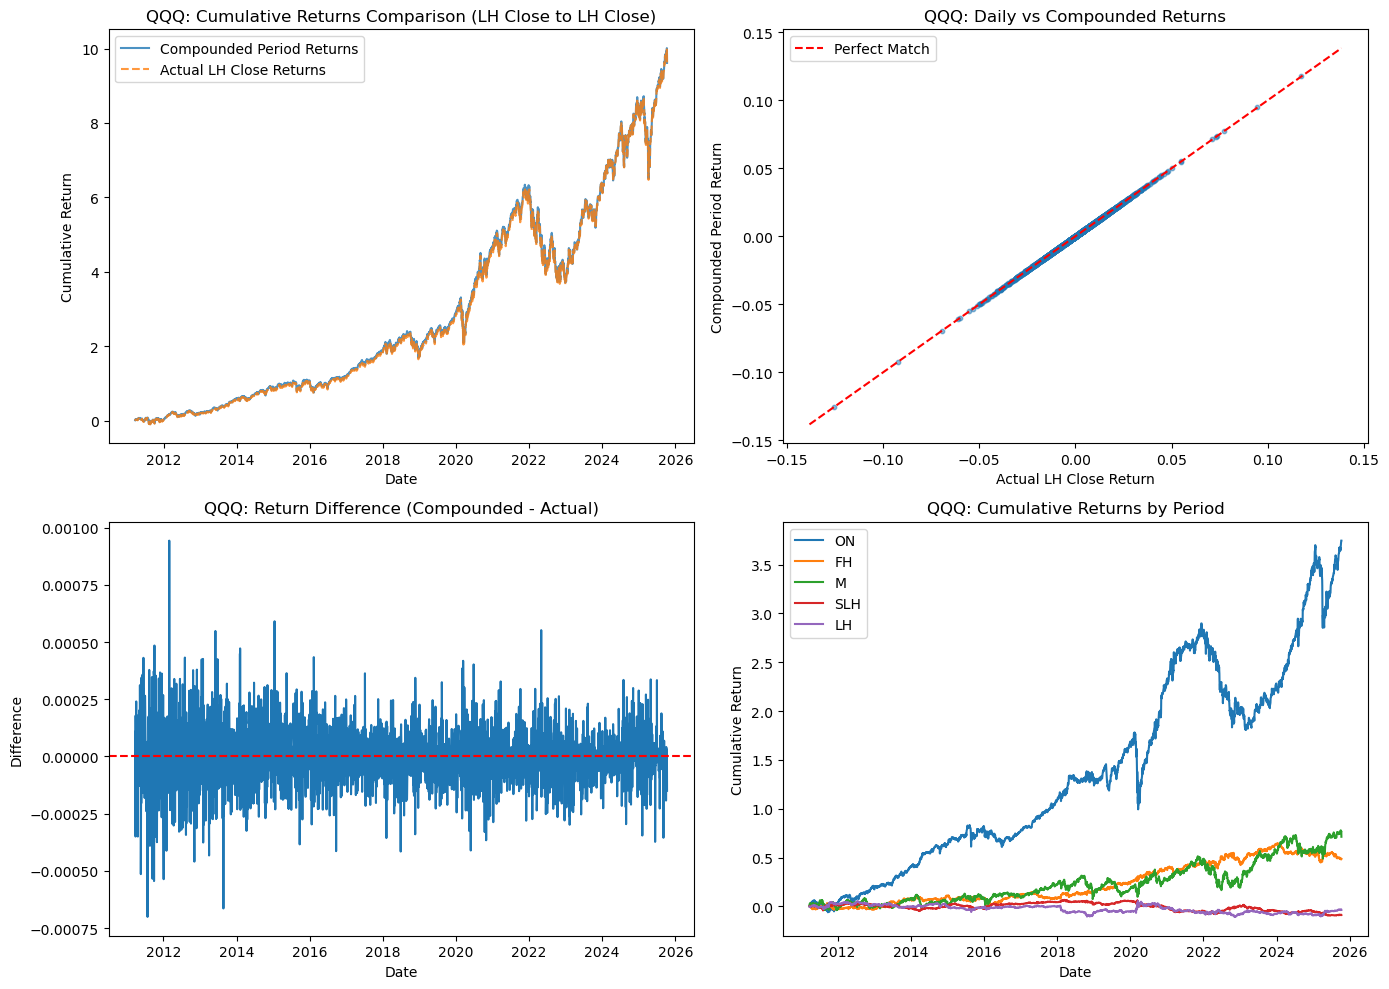


=== QQQ Verification Statistics ===
Mean absolute error: 0.000091
Max absolute error: 0.000944
Correlation: 0.999955

Verifying TQQQ...


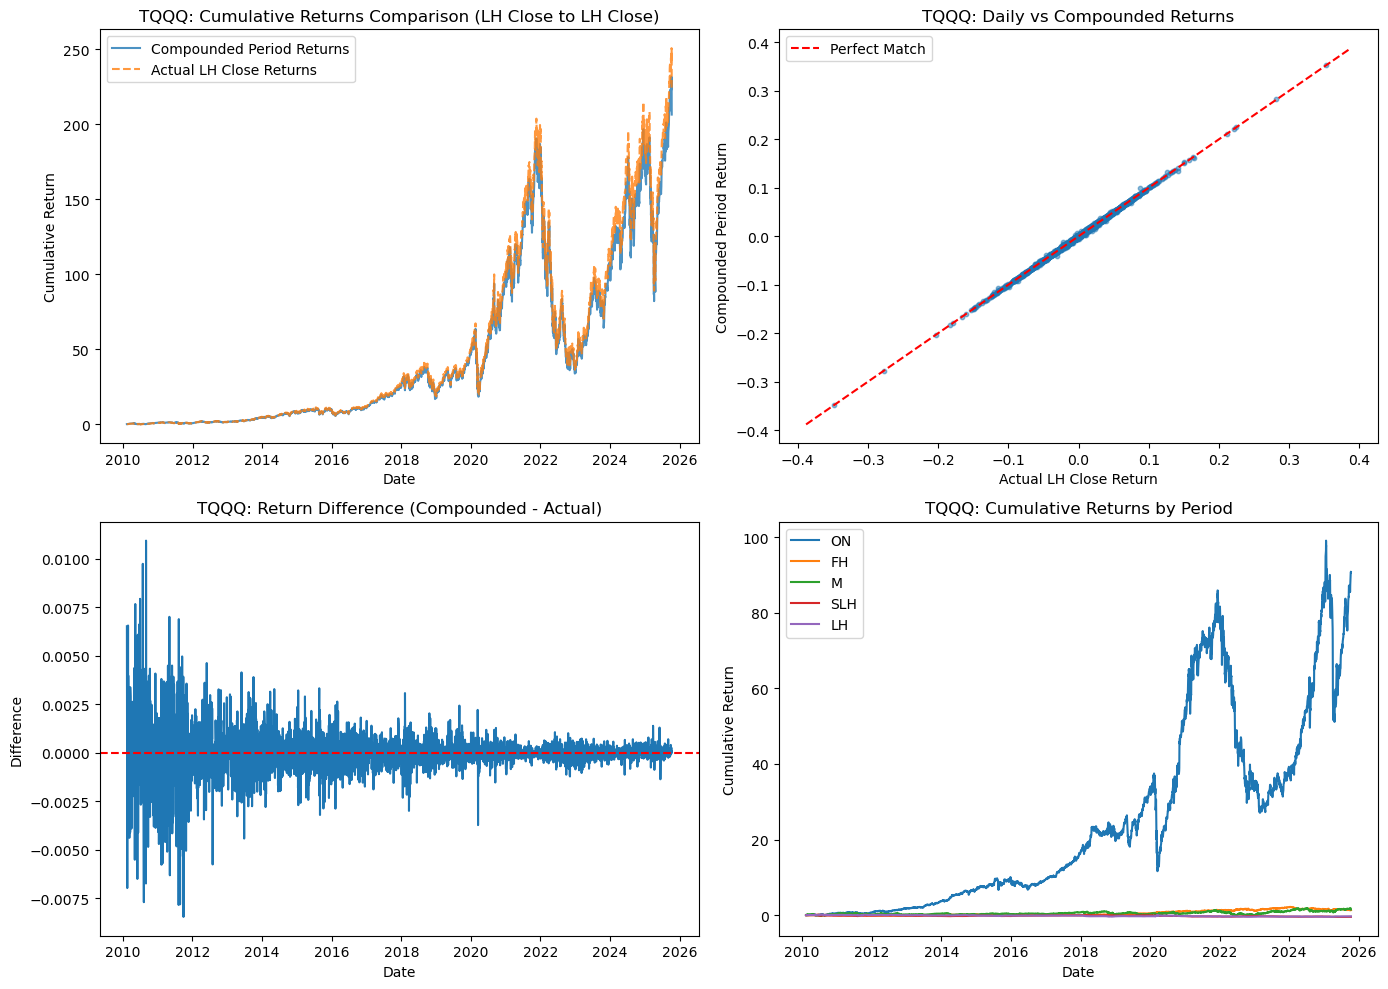


=== TQQQ Verification Statistics ===
Mean absolute error: 0.000672
Max absolute error: 0.010935
Correlation: 0.999564


In [36]:
# Verify period returns sum to daily returns (LH close to LH close)
def verify_period_returns(period_returns, eod_df, ticker_name):
    """
    Verify that compounded period returns equal daily LH close-to-LH close returns.
    This is the correct comparison since ON is calculated from prev LH close to current FH open.
    """
    # Merge period returns with daily data
    verification = period_returns.copy()
    
    # Compound all periods: (1+ON)*(1+FH)*(1+M)*(1+SLH)*(1+LH) - 1
    periods = ['ON', 'FH', 'M', 'SLH', 'LH']
    available_periods = [p for p in periods if p in verification.columns]
    
    # Calculate compounded return from all periods
    verification['compounded_ret'] = 1
    for period in available_periods:
        verification['compounded_ret'] *= (1 + verification[period].fillna(0))
    verification['compounded_ret'] -= 1
    
    # Calculate actual daily return from LH close prices (market close ~15:59)
    lh_closes = eod_df[eod_df['time_period'] == 'LH'].groupby('date_only').agg({
        'Close': 'last'
    }).reset_index()
    lh_closes.columns = ['date_only', 'lh_close']
    lh_closes['actual_ret'] = lh_closes['lh_close'].pct_change()
    
    # Merge and compare
    comparison = verification.merge(
        lh_closes[['date_only', 'actual_ret', 'lh_close']], 
        on='date_only', 
        how='inner'
    )
    
    # Plot comparison
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Cumulative returns comparison
    comparison['cum_compounded'] = (1 + comparison['compounded_ret']).cumprod() - 1
    comparison['cum_actual'] = (1 + comparison['actual_ret'].fillna(0)).cumprod() - 1
    
    axes[0, 0].plot(comparison['date_only'], comparison['cum_compounded'], label='Compounded Period Returns', alpha=0.8)
    axes[0, 0].plot(comparison['date_only'], comparison['cum_actual'], label='Actual LH Close Returns', alpha=0.8, linestyle='--')
    axes[0, 0].set_title(f'{ticker_name}: Cumulative Returns Comparison (LH Close to LH Close)')
    axes[0, 0].legend()
    axes[0, 0].set_xlabel('Date')
    axes[0, 0].set_ylabel('Cumulative Return')
    
    # 2. Daily returns scatter plot
    axes[0, 1].scatter(comparison['actual_ret'], comparison['compounded_ret'], alpha=0.5, s=10)
    max_val = max(comparison['actual_ret'].abs().max(), comparison['compounded_ret'].abs().max()) * 1.1
    axes[0, 1].plot([-max_val, max_val], [-max_val, max_val], 'r--', label='Perfect Match')
    axes[0, 1].set_title(f'{ticker_name}: Daily vs Compounded Returns')
    axes[0, 1].set_xlabel('Actual LH Close Return')
    axes[0, 1].set_ylabel('Compounded Period Return')
    axes[0, 1].legend()
    
    # 3. Difference (error) over time
    comparison['error'] = comparison['compounded_ret'] - comparison['actual_ret']
    axes[1, 0].plot(comparison['date_only'], comparison['error'])
    axes[1, 0].axhline(y=0, color='r', linestyle='--')
    axes[1, 0].set_title(f'{ticker_name}: Return Difference (Compounded - Actual)')
    axes[1, 0].set_xlabel('Date')
    axes[1, 0].set_ylabel('Difference')
    
    # 4. Individual period contributions
    period_cumrets = pd.DataFrame({'date_only': comparison['date_only']})
    for period in available_periods:
        period_cumrets[period] = (1 + comparison[period].fillna(0)).cumprod() - 1
    
    for period in available_periods:
        axes[1, 1].plot(period_cumrets['date_only'], period_cumrets[period], label=period)
    axes[1, 1].set_title(f'{ticker_name}: Cumulative Returns by Period')
    axes[1, 1].legend()
    axes[1, 1].set_xlabel('Date')
    axes[1, 1].set_ylabel('Cumulative Return')
    
    plt.tight_layout()
    plt.show()
    
    # Print statistics
    print(f"\n=== {ticker_name} Verification Statistics ===")
    print(f"Mean absolute error: {comparison['error'].abs().mean():.6f}")
    print(f"Max absolute error: {comparison['error'].abs().max():.6f}")
    print(f"Correlation: {comparison['compounded_ret'].corr(comparison['actual_ret']):.6f}")
    
    return comparison

# Run verification for both tickers (pass eod_df instead of daily_df)
print(f"Verifying {ticker1}...")
verification1 = verify_period_returns(period_returns1, eod1, ticker1)

print(f"\nVerifying {ticker2}...")
verification2 = verify_period_returns(period_returns2, eod2, ticker2)

Plotting ROD3 vs LH for QQQ...


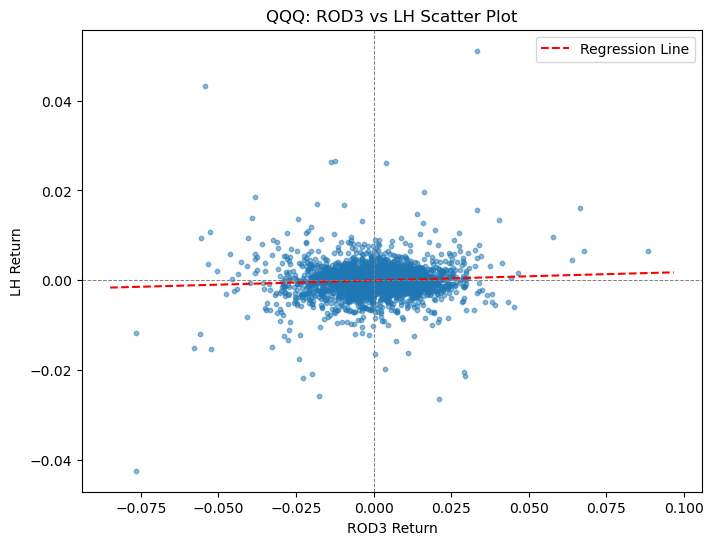

QQQ ROD3 vs LH Correlation: 0.066392
Plotting ROD3 vs LH for TQQQ...


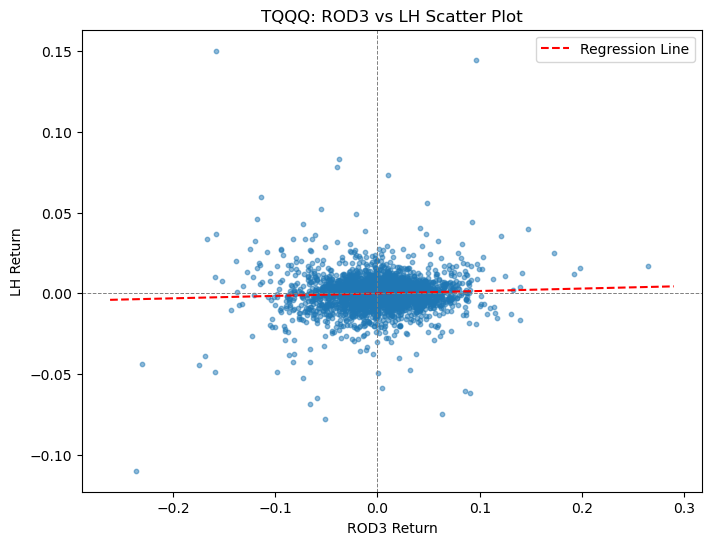

TQQQ ROD3 vs LH Correlation: 0.054091


In [37]:
"""
This strategy exploits the negative relationship between the return of a stock obtained 
in the early parts of the day (ROD3) and its return in the last half hour (LH)
"""

# Scatter plot of ROD3 vs LH for both tickers, with regression line
def plot_rod3_vs_lh(period_returns, ticker_name):
    """
    Plot ROD3 vs LH scatter plot with regression line.
    """
    df = period_returns.dropna(subset=['ROD3', 'LH'])
    
    plt.figure(figsize=(8, 6))
    plt.scatter(df['ROD3'], df['LH'], alpha=0.5, s=10)
    
    # Fit regression line
    m, b = np.polyfit(df['ROD3'], df['LH'], 1)
    x_vals = np.array(plt.gca().get_xlim())
    y_vals = m * x_vals + b
    plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Regression Line')
    
    plt.title(f'{ticker_name}: ROD3 vs LH Scatter Plot')
    plt.xlabel('ROD3 Return')
    plt.ylabel('LH Return')
    plt.axhline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.axvline(0, color='grey', linestyle='--', linewidth=0.7)
    plt.legend()
    plt.show()
    
    # Print regression statistics
    correlation = df['ROD3'].corr(df['LH'])
    print(f"{ticker_name} ROD3 vs LH Correlation: {correlation:.6f}")

print(f"Plotting ROD3 vs LH for {ticker1}...")
plot_rod3_vs_lh(period_returns1, ticker1)   
print(f"Plotting ROD3 vs LH for {ticker2}...")
plot_rod3_vs_lh(period_returns2, ticker2)

# Adapting the Strategy to a Single Stock

## The Cross-Sectional vs Time-Series Challenge

The original paper documents a **cross-sectional** phenomenon — stocks that underperform *relative to other stocks* during the day tend to reverse in the last half-hour. Applying this to a single stock shifts the analysis from cross-sectional to **time-series reversal**.

> **Key Limitation**: The end-of-day reversal effect is primarily driven by cross-sectional autocorrelation between stocks, not individual stock momentum patterns.

---

## Single-Stock Signal Adaptation

### The Asymmetry Principle

The reversal effect is **asymmetric** — it is almost entirely driven by **negative ROD3** returns (intraday losers).

| ROD3 Signal | Action | Statistical Support |
|-------------|--------|---------------------|
| **Negative** (intraday loser) | Go **Long** in LH | Strong — ~400% cumulative gain in paper's bottom decile |
| **Positive** (intraday winner) | Go **Short** in LH | Weak — reversal much less pronounced or absent |

### Practical Implication
For a single stock, the strategy becomes an **asymmetric long-only** approach:
- **Buy** during LH only when ROD3 is significantly negative
- **Avoid shorting** winners — insufficient statistical edge

---

## Driving Mechanisms for Single Stocks

### 1. Buy-the-Dip Effect
Strong negative ROD3 attracts **retail investor attention**, triggering end-of-day buying pressure that causes the reversal.

### 2. Reduced Short-Selling Pressure
When ROD3 is negative, short sellers **reduce new positions** in LH to manage overnight risk, allowing prices to rebound.

---

## Success Factors for Single-Stock Application

| Factor | Requirement |
|--------|-------------|
| **Volatility** | Frequent extreme intraday price swings |
| **ROD3-LH Correlation** | Persistent negative correlation over time |
| **Liquidity** | Sufficient volume for execution in LH window |

---

## Conclusion

> Applying the EOD reversal to a single stock transforms it into a **short-term asymmetric strategy** focused on buying intraday losers.

The strategy works best when:
- The stock exhibits significant negative ROD3
- There's a robust historical negative correlation between ROD3 and LH

**Caveat**: The strategy's greatest strength remains in cross-sectional portfolio construction, not single-stock trading.

In [38]:
"""
Long Only Scenario for Single Ticker

Thesis:
Buy-the-Dip Effect
Strong negative ROD3 attracts retail investor attention, 
triggering end-of-day buying pressure that causes the reversal.
""";

# Define long only strategy based on ROD3 signal
def long_only_strategy(period_returns, threshold=-0.01):
    """
    Long Only Strategy:
    - Enter long position at the start of LH if ROD3 < threshold
    - Exit position at the end of LH
    """
    df = period_returns.copy()
    
    # Generate signals
    df['long_signal'] = np.where(df['ROD3'] < threshold, 1, 0)
    
    # Calculate strategy returns
    df['strategy_ret'] = df['long_signal'] * df['LH']
    
    # Calculate cumulative returns
    df['cum_strategy_ret'] = (1 + df['strategy_ret'].fillna(0)).cumprod() - 1
    
    return df

# Apply long only strategy to both tickers
strategy_results1 = long_only_strategy(period_returns1, threshold=-0.01)
strategy_results2 = long_only_strategy(period_returns2, threshold=-0.01)

Plotting Long Only Strategy vs Buy and Hold for QQQ...


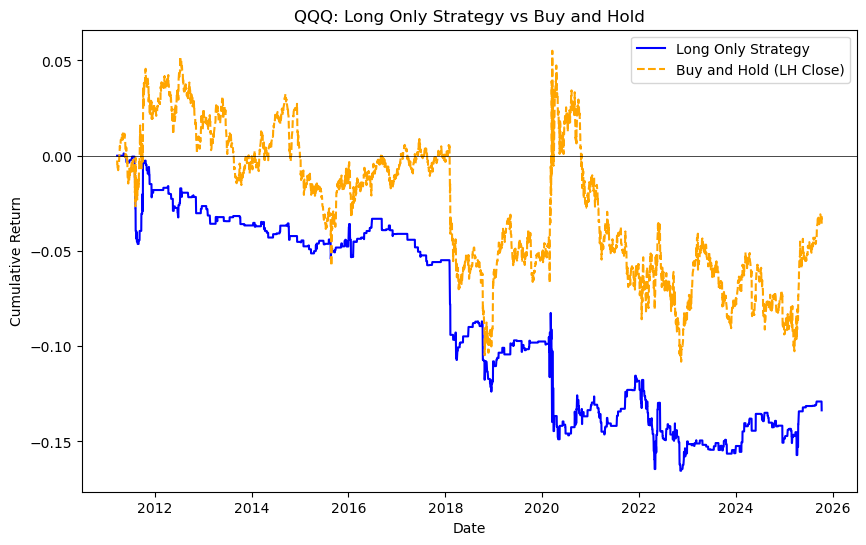


=== QQQ Long Strategy Statistics ===
Number of trades: 499 / 3661 days (13.6%)
Average return per trade: -0.0274%
Win rate: 47.09%
Final cumulative return: -13.37%
Buy & Hold cumulative return: -3.63%
Plotting Long Only Strategy vs Buy and Hold for TQQQ...


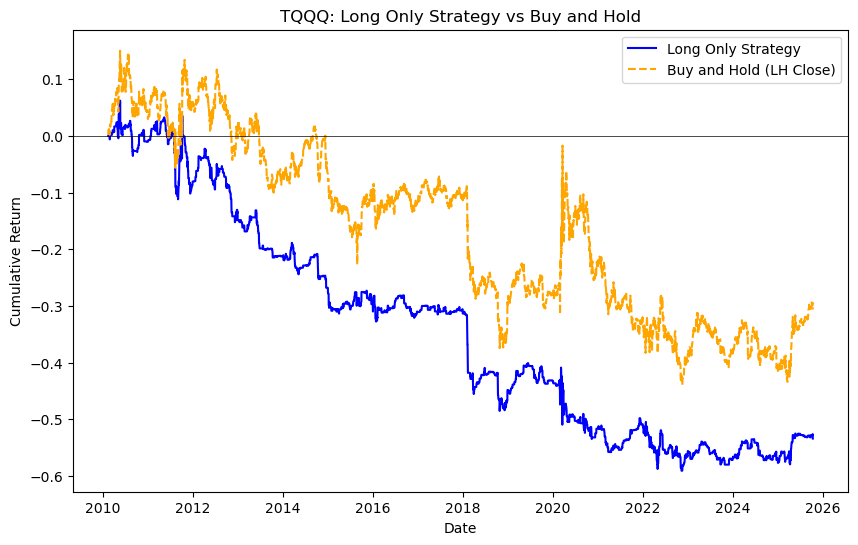


=== TQQQ Long Strategy Statistics ===
Number of trades: 1135 / 3941 days (28.8%)
Average return per trade: -0.0587%
Win rate: 47.40%
Final cumulative return: -53.41%
Buy & Hold cumulative return: -30.63%


In [39]:
# Plot strategy cumulative returns vs buy-and-hold cumulative returns
def plot_strategy_vs_buy_and_hold(strategy_results, period_returns, ticker_name):
    """
    Plot strategy cumulative returns vs buy-and-hold cumulative returns.
    """
    # Buy-and-hold cumulative returns from LH close prices
    period_returns = period_returns.copy()
    period_returns['buy_and_hold_ret'] = period_returns['LH']
    period_returns['cum_buy_and_hold'] = (1 + period_returns['buy_and_hold_ret'].fillna(0)).cumprod() - 1
    
    plt.figure(figsize=(10, 6))
    plt.plot(strategy_results['date_only'], strategy_results['cum_strategy_ret'], label='Long Only Strategy', color='blue')
    plt.plot(period_returns['date_only'], period_returns['cum_buy_and_hold'], label='Buy and Hold (LH Close)', color='orange', linestyle='--')
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
    
    plt.title(f'{ticker_name}: Long Only Strategy vs Buy and Hold')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()
    
    # Print strategy statistics
    n_trades = strategy_results['long_signal'].sum()
    n_days = len(strategy_results)
    avg_ret = strategy_results.loc[strategy_results['long_signal'] == 1, 'strategy_ret'].mean()
    win_rate = (strategy_results.loc[strategy_results['long_signal'] == 1, 'strategy_ret'] > 0).mean()
    
    print(f"\n=== {ticker_name} Long Strategy Statistics ===")
    print(f"Number of trades: {n_trades} / {n_days} days ({100*n_trades/n_days:.1f}%)")
    print(f"Average return per trade: {avg_ret*100:.4f}%")
    print(f"Win rate: {win_rate*100:.2f}%")
    print(f"Final cumulative return: {strategy_results['cum_strategy_ret'].iloc[-1]*100:.2f}%")
    print(f"Buy & Hold cumulative return: {period_returns['cum_buy_and_hold'].iloc[-1]*100:.2f}%")

print(f"Plotting Long Only Strategy vs Buy and Hold for {ticker1}...")
plot_strategy_vs_buy_and_hold(strategy_results1, period_returns1, ticker1)
print(f"Plotting Long Only Strategy vs Buy and Hold for {ticker2}...")
plot_strategy_vs_buy_and_hold(strategy_results2, period_returns2, ticker2)

In [40]:
"""
Short Only Scenario for Single Ticker

Thesis:
When ROD3 is POSITIVE (intraday winners), short sellers may have reduced activity,
but the reversal effect is weaker. We test shorting winners in LH expecting mean reversion.

Note: Per the paper, the short side has weaker statistical support compared to the long side.
The reversal is much less pronounced for positive ROD3 returns.
""";

# Define short only strategy based on ROD3 signal
def short_only_strategy(period_returns, threshold=0.01):
    """
    Short Only Strategy:
    - Enter short position at the start of LH if ROD3 > threshold (intraday winners)
    - Exit position at the end of LH
    - Short profit = -LH return (we profit when price drops)
    """
    df = period_returns.copy()
    
    # Generate signals (short when ROD3 is positive/high)
    df['short_signal'] = np.where(df['ROD3'] > threshold, 1, 0)
    
    # Calculate strategy returns (negative of LH return for short positions)
    df['strategy_ret'] = df['short_signal'] * (-df['LH'])
    
    # Calculate cumulative returns
    df['cum_strategy_ret'] = (1 + df['strategy_ret'].fillna(0)).cumprod() - 1
    
    return df

# Apply short only strategy to both tickers
short_strategy_results1 = short_only_strategy(period_returns1, threshold=0.01)
short_strategy_results2 = short_only_strategy(period_returns2, threshold=0.01)

Plotting Short Only Strategy for QQQ...


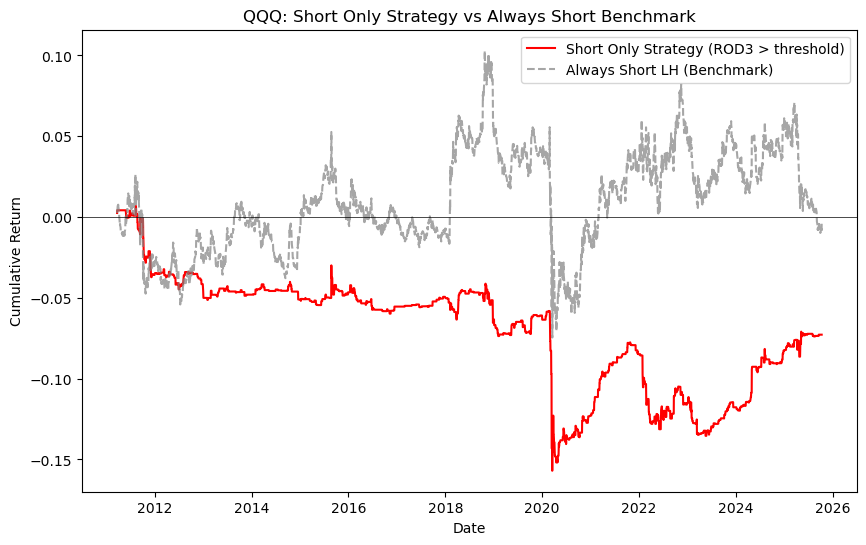


=== QQQ Short Strategy Statistics ===
Number of trades: 608 / 3661 days (16.6%)
Average return per trade: -0.0116%
Win rate: 49.18%
Final cumulative return: -7.28%

Plotting Short Only Strategy for TQQQ...


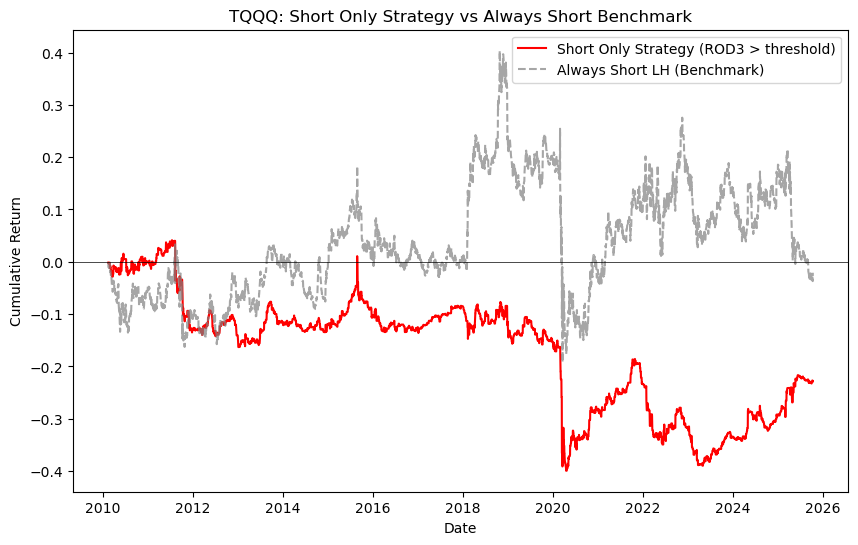


=== TQQQ Short Strategy Statistics ===
Number of trades: 1510 / 3941 days (38.3%)
Average return per trade: -0.0130%
Win rate: 48.28%
Final cumulative return: -22.87%


In [41]:
# Plot short strategy cumulative returns vs buy-and-hold cumulative returns
def plot_short_strategy_vs_benchmark(strategy_results, period_returns, ticker_name):
    """
    Plot short strategy cumulative returns vs always-short benchmark.
    """
    period_returns = period_returns.copy()
    
    # Always-short benchmark: profit when LH is negative
    period_returns['always_short_ret'] = -period_returns['LH']
    period_returns['cum_always_short'] = (1 + period_returns['always_short_ret'].fillna(0)).cumprod() - 1
    
    plt.figure(figsize=(10, 6))
    plt.plot(strategy_results['date_only'], strategy_results['cum_strategy_ret'], 
             label='Short Only Strategy (ROD3 > threshold)', color='red')
    plt.plot(period_returns['date_only'], period_returns['cum_always_short'], 
             label='Always Short LH (Benchmark)', color='grey', linestyle='--', alpha=0.7)
    plt.axhline(0, color='black', linestyle='-', linewidth=0.5)
    
    plt.title(f'{ticker_name}: Short Only Strategy vs Always Short Benchmark')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Return')
    plt.legend()
    plt.show()
    
    # Print strategy statistics
    n_trades = strategy_results['short_signal'].sum()
    n_days = len(strategy_results)
    avg_ret = strategy_results.loc[strategy_results['short_signal'] == 1, 'strategy_ret'].mean()
    win_rate = (strategy_results.loc[strategy_results['short_signal'] == 1, 'strategy_ret'] > 0).mean()
    
    print(f"\n=== {ticker_name} Short Strategy Statistics ===")
    print(f"Number of trades: {n_trades} / {n_days} days ({100*n_trades/n_days:.1f}%)")
    print(f"Average return per trade: {avg_ret*100:.4f}%")
    print(f"Win rate: {win_rate*100:.2f}%")
    print(f"Final cumulative return: {strategy_results['cum_strategy_ret'].iloc[-1]*100:.2f}%")

print(f"Plotting Short Only Strategy for {ticker1}...")
plot_short_strategy_vs_benchmark(short_strategy_results1, period_returns1, ticker1)

print(f"\nPlotting Short Only Strategy for {ticker2}...")
plot_short_strategy_vs_benchmark(short_strategy_results2, period_returns2, ticker2)